In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder

In [3]:
seed = 45
%matplotlib inline
plt.style.use('fivethirtyeight')

## Import Data

In [4]:
path = '/Users/ballmdr/Downloads/titanic'

In [5]:
train = pd.read_csv(path + '/train.csv')
test = pd.read_csv(path + '/test.csv')

In [6]:
print('Number rows and columns Train: ', train.shape)
print('Number rows and columns Test: ', test.shape)

Number rows and columns Train:  (891, 12)
Number rows and columns Test:  (418, 11)


## Explore data

In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


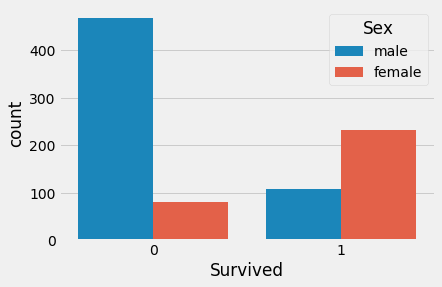

In [13]:
sns.countplot(data=train, x='Survived', hue='Sex')

In [10]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

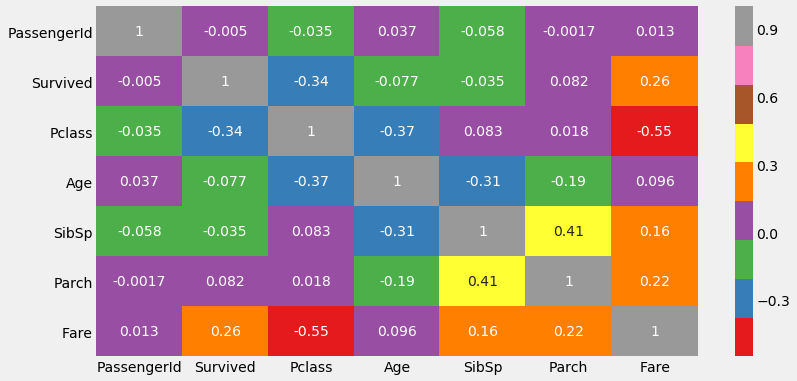

In [15]:
cor = train.corr()
plt.figure(figsize=(12,6))
sns.heatmap(cor, cmap='Set1', annot=True)

## Check NAN

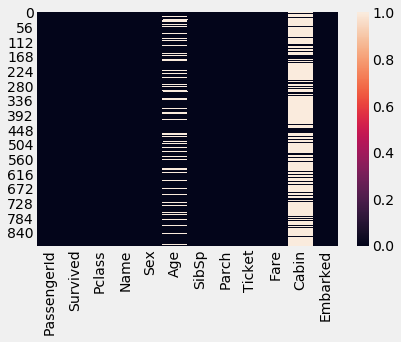

In [16]:
sns.heatmap(train.isnull())

In [17]:
k = pd.DataFrame()
k['train'] = train.isnull().sum()
k['test'] = test.isnull().sum()
k.T

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
train,0.0,0.0,0.0,0.0,0.0,177.0,0.0,0.0,0.0,0.0,687.0,2.0
test,0.0,NaN,0.0,0.0,0.0,86.0,0.0,0.0,0.0,1.0,327.0,0.0


## Dealing with missing values

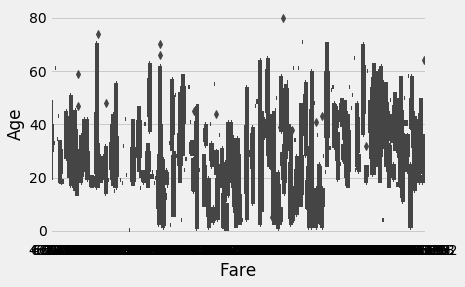

In [23]:
sns.boxplot(data=train, x='Fare', y='Age')

## ML

In [29]:
unwanted = ['PassengerId', 'Survived', 'Name', 'Cabin', 'Ticket']
X = train.drop(unwanted, axis=1)
y = train['Survived']
x_test = test.drop(unwanted, axis=1)

KeyError: "['Survived'] not found in axis"

In [25]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

In [27]:
kf.split(X,y)

NameError: name 'X' is not defined

In [ ]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
pred_test_full = 0
cv_score = []

i = 1
for train_index, test_index in kf.split(X,y)